# Ch02.02. 선그래프

---
* 날짜: 2022.04.15
* 이름: 윤태우



##  개념정리 
---

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 4]
plt.style.use('seaborn-white')
sns.set_style('white')
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [4, 3] # [가로, 세로] 그림의 디폴트 사이즈
plt.style.use('seaborn-white')
sns.set_style('white')

### **01. Matplotlib 으로 그리기**
---

#### **| 기본사용**

```
xs = ['Jan', 'Fab', 'Mar', 'Apr', 'May', 'Jun']
nums = [35, 40, 35, 40, 55, 45]
plt.bar(xs, nums)
plt.show()
```

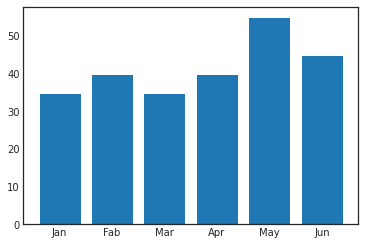

In [2]:
xs = ['Jan', 'Fab', 'Mar', 'Apr', 'May', 'Jun']
nums = [35, 40, 35, 40, 55, 45]
plt.bar(xs, nums)
plt.show()

<function matplotlib.pyplot.legend>

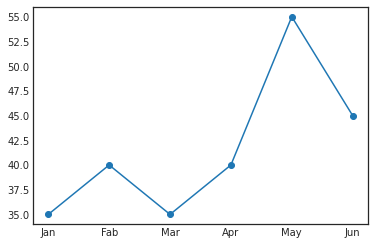

In [3]:
plt.plot(xs,nums, marker = 'o', label='sale')
plt.legend

### **02. Seaborn 으로 그리기**
---



#### **| 기본사용**

```
sns.lineplot(x=xs, y=nums)
plt.show()
```

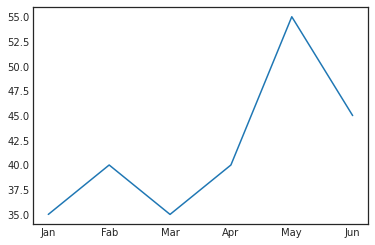

In [5]:
sns.lineplot(x=xs, y=nums)
plt.show()

#### **| DataFrame 사용**
---



* 데이터 프레임을 만들어 줍니다.



In [7]:
df= pd.DataFrame([xs, nums]).T
df.columns=['Month', 'Counts']
df

,Month,Counts
0,Jan,35
1,Fab,40
2,Mar,35
3,Apr,40
4,May,55
5,Jun,45


* 데이터프레임에서 기본적으로 플롯을 제공합니다.


```
df.plot(x=x,y=y)
```



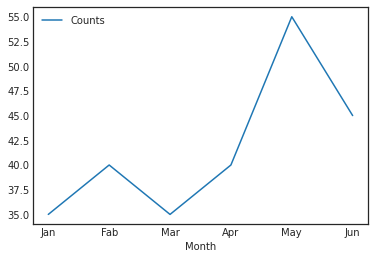

In [9]:
df.plot(x='Month',y='Counts')
plt.show()

* 데이터프레임 기반으로 seaborn을 사용합니다.


```
sns.lineplot(data=df,x=x, y=y')
```


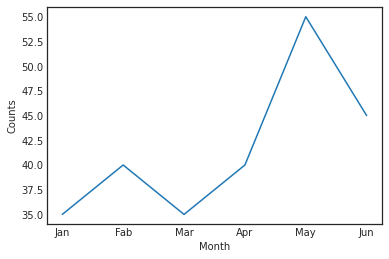

In [10]:
#sns.lineplot(x=xs, y=nums)
sns.lineplot(data=df,x='Month', y='Counts')


## 실습


### **01. 플롯 분할**
---

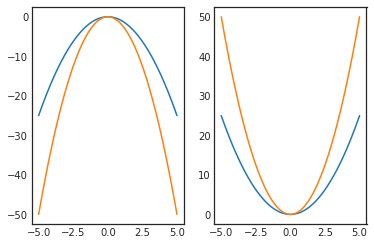

In [21]:
x = np.linspace(-5,5,1000) # -5부터 5까지 1000개 데이터
def func2(a) :
  y = a*(x**2)
  return y

# 왼쪽
plt.subplot(1,2,1) # (행의 갯수, 열의 갯수, 위치)
plt.plot(x, func2(-1))   #y = -x^2
plt.plot(x, func2(-2))   #y = -2x^2

# 오른쪽
plt.subplot(1,2,2) # (행의 갯수, 열의 갯수, 위치)
plt.plot(x, func2(1))   #y = x^2
plt.plot(x, func2(2))   #y = 2x^2

plt.show()

### **02. 눈금 공유**
---



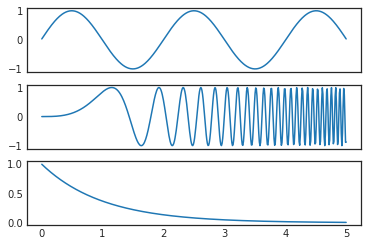

In [36]:
t = np.arange(0.01,5,0.01) #0.01부터 5까지 0.01 단위 추가
s1 = np.sin(t*np.pi)
s2 = np.sin(t**np.pi)
s3 = np.exp(-t)

ax1 = plt.subplot(3,1,1)
plt.plot(t,s1)
plt.tick_params('x', labelbottom=False)# 눈금 지우기
ax2 = plt.subplot(3,1,2, sharex=ax1)   # 축 공유
plt.plot(t,s2)
plt.tick_params('x', labelbottom=False)# 눈금 지우기
ax3 = plt.subplot(3,1,3)
plt.plot(t,s3)

plt.show()


## 과제


### **01. 로그함수와 지수함수 그리기**
---

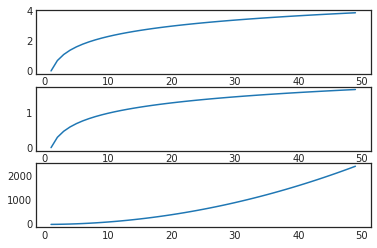

In [75]:
x = np.arange(1,50)

def func1(a) :
  y = np.log(x)+0*a
  return y
def func2(a) :
  y = np.log10(x)+0*a
  return y

def func3(a) :
  y = x**a
  return y

plt.subplot(3,1,1)
plt.plot(x, func1(2))
plt.subplot(3,1,2)
plt.plot(x, func2(2))
plt.subplot(3,1,3)
plt.plot(x, func3(2))

plt.show()

### **02. 램덤값 비교하기**
---

- 넘파이로 표준정규분포를 따르는 50개의 데이터를 총 세개 추출하세요.
- 세개의 데이터를 3 x 1 플롯으로 그리세요
- 세개의 플롯의 눈금을 모두 공유하세요.

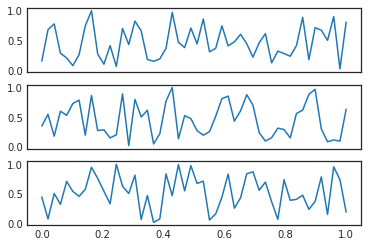

In [101]:
a = np.random.rand(50)
b = np.random.rand(50)
c = np.random.rand(50)
x = np.linspace(0,1,50)

plt.subplot(3,1,1)
plt.plot(x,a)
plt.tick_params('x', labelbottom = False)
plt.subplot(3,1,2)
plt.plot(x,b)
plt.tick_params('x', labelbottom = False)
plt.subplot(3,1,3)
plt.plot(x,c)

plt.show()

#03.flights 데이터

In [102]:
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


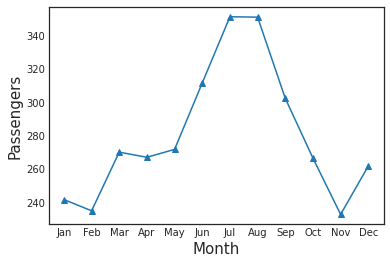

In [169]:
# 월별 평균 승객수

import warnings
warnings.filterwarnings("ignore") # 경고메세지 차단

month_group = df['passengers'].groupby(df['month']).mean()
plt.plot(month_group, marker = '^')
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Passengers', fontsize = 15)
plt.show()

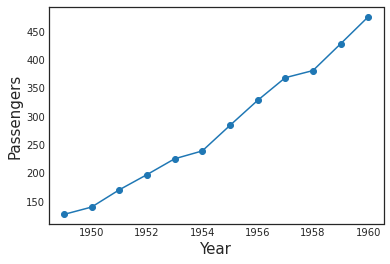

In [164]:
# 연도별 평균 승객수

year_group = df['passengers'].groupby(df['year']).mean()
plt.plot(year_group, marker = 'o')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Passengers', fontsize = 15)
plt.show()